In [1]:
#!pip install sodapy

# Datasets

In [2]:
import pandas as pd
from sodapy import Socrata

- neighbourhood
- bugs
- bikes

## neighbourhoods

In [3]:
import shapely.geometry
from geopandas import GeoDataFrame
client = Socrata("data.winnipeg.ca", None)
neighbourhoods_id = "xaux-29zr"
neighbourhoods = client.get(neighbourhoods_id, limit=2000)
neighbourhoods = GeoDataFrame(neighbourhoods)
newgeom = [shapely.geometry.Polygon(x['coordinates'][0][0]) for x in neighbourhoods.the_geom]
neighbourhoods['newgeom'] = newgeom
neighbourhoods = neighbourhoods.set_geometry('newgeom')
neighbourhoods.head()


,id,name,the_geom,newgeom
0,696,Seven Oaks,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.11021888431701 49.925633193803, ..."
1,178,Parker,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.17615035641499 49.850537882086, ..."
2,630,The Maples,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.163398354858 49.941591371416, -9..."
3,702,Luxton,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.116047777972 49.920325228662, -9..."
4,1012,Talbot-Grey,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...","POLYGON ((-97.101068054847 49.904738664792, -9..."


In [4]:
neighbourhoods.plot()

## bikes

In [5]:
client = Socrata("data.winnipeg.ca", None)
bikes = client.get("9t9k-ya8b", limit=10000)
bikes = pd.DataFrame(bikes)
bikes.head(3).T

,0,1,2
asset_class,STAND-ALONE PLAY COMPONENT,SEATING,SEATING
asset_id,46292,47525,24478
asset_size,N/A,N/A,N/A
asset_type,N/A,BENCH,BENCH
geom_type,POINT,POINT,POINT
park_id,1137,266,1179
park_name,Frontenac Park,Muriel Street Park,Aberdeen Adventure Playground
prim_field,N/A,N/A,N/A
the_geom,"{'type': 'Point', 'coordinates': [-97.08174796...","{'type': 'Point', 'coordinates': [-97.29729904...","{'type': 'Point', 'coordinates': [-97.12915711..."


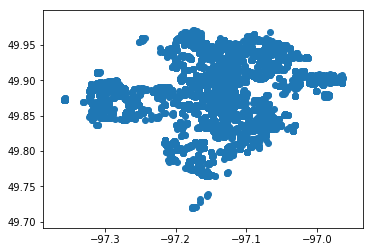

In [6]:
from shapely.geometry import Point

newgeom = [Point(x['coordinates']) for x in bikes.the_geom]
bikes['newgeom'] = newgeom
bikes = bikes.set_geometry('newgeom')
bikes.plot()

## bugs

In [7]:
import pandas as pd
from geopandas import GeoDataFrame
client = Socrata("data.winnipeg.ca", None)
bugs = client.get("du7c-8488", limit=2000)
bugs = GeoDataFrame(bugs)

# wrangling
idvars = ['count_date', 'trap_days']
location_only = [x for x in bugs.columns if "average" not in x]
location_only = [x for x in location_only if x not in idvars]
print(f"number of locations {len(location_only)}")

# make wide to long 
bugs = pd.melt(bugs[location_only + idvars], id_vars = idvars, var_name = 'location', value_name = 'bugcount')
bugs = GeoDataFrame(bugs)
bugs.head()

number of locations 37


,count_date,trap_days,location,bugcount
0,2015-05-04T00:00:00,3,north_east_1,0
1,2015-05-06T00:00:00,2,north_east_1,2
2,2015-05-08T00:00:00,2,north_east_1,0
3,2015-05-11T00:00:00,3,north_east_1,0
4,2015-05-13T00:00:00,2,north_east_1,1


buglocations2gps = \
{"north_east_1": {"coord": [49.951867, -97.059306]}
,"north_east_2": {"coord": [49.933941, -97.096341]}
,"north_east_3": {"coord": [49.924809, -97.056330]}
,"north_east_4": {"coord": [49.906175, -97.094797]}
,"north_east_5": {"coord": [49.892358, -97.022426]}
,"north_east_6": {"coord": [49.918257, -97.043848]}
,"north_east_7": {"coord": [49.904900, -96.981602]}
,"north_west_1": {"coord": [49.890104, -97.308464]}
,"north_west_2": {"coord": [49.882624, -97.238131]}
,"north_west_3": {"coord": [49.888943, -97.193254]}
,"north_west_4": {"coord": [49.920877, -97.202540]}
,"north_west_5": {"coord": [49.931627, -97.170450]}
,"north_west_6": {"coord": [49.975104, -97.147863]}
,"north_west_7": {"coord": [49.948876, -97.126311]}
,"rural_aa": {"coord": [49.981128, -97.244987]}
,"rural_bb": {"coord": [49.999793, -97.194880]}
,"rural_cc": {"coord": [49.991068, -97.089770]}
,"rural_dd": {"coord": [49.990523, -97.013920]}
,"rural_ee": {"coord": [49.852485, -96.986202]}
,"rural_ff": {"coord": [49.800355, -97.073122]}
,"rural_gg": {"coord": [49.782835, -97.339871]}
,"rural_hh": {"coord": [49.854707, -97.338403]}
,"rural_ii": {"coord": [49.890188, -97.341707]}
,"south_east_1": {"coord": [49.52426, 97.07156]}
,"south_east_2": {"coord": [49.856801, -97.109705]}
,"south_east_3": {"coord": [49.859405, -97.066774]}
,"south_east_4": {"coord": [49.824369, -97.133797]}
,"south_east_5": {"coord": [49.829048, -97.098352]}
,"south_east_6": {"coord": [49.827414, -97.060787]}
,"south_east_7": {"coord": [49.806356, -97.100467]}
,"south_west_1": {"coord": [49.832983, -97.332547]}
,"south_west_2": {"coord": [49.852445, -97.275173]}
,"south_west_3": {"coord": [49.868974, -97.243095]}
,"south_west_4": {"coord": [49.868834, -97.184476]}
,"south_west_5": {"coord": [49.818122, -97.165982]}
 }

In [8]:
buglocations2gps = \
{"north_east_1": {"coord": [49.951867, -97.059306]}
,"north_east_2": {"coord": [49.933941, -97.096341]}
,"north_east_3": {"coord": [49.924809, -97.056330]}
,"north_east_4": {"coord": [49.906175, -97.094797]}
,"north_east_5": {"coord": [49.892358, -97.022426]}
,"north_east_6": {"coord": [49.918257, -97.043848]}
,"north_east_7": {"coord": [49.904900, -96.981602]}
,"north_west_1": {"coord": [49.890104, -97.308464]}
,"north_west_2": {"coord": [49.882624, -97.238131]}
,"north_west_3": {"coord": [49.888943, -97.193254]}
,"north_west_4": {"coord": [49.920877, -97.202540]}
,"north_west_5": {"coord": [49.931627, -97.170450]}
,"north_west_6": {"coord": [49.975104, -97.147863]}
,"north_west_7": {"coord": [49.948876, -97.126311]}
,"rural_aa": {"coord": [49.981128, -97.244987]}
,"rural_bb": {"coord": [49.999793, -97.194880]}
,"rural_cc": {"coord": [49.991068, -97.089770]}
,"rural_dd": {"coord": [49.990523, -97.013920]}
,"rural_ee": {"coord": [49.852485, -96.986202]}
,"rural_ff": {"coord": [49.800355, -97.073122]}
,"rural_gg": {"coord": [49.782835, -97.339871]}
,"rural_hh": {"coord": [49.854707, -97.338403]}
,"rural_ii": {"coord": [49.890188, -97.341707]}
,"south_east_1": {"coord": [49.874801, -97.127406]}
,"south_east_2": {"coord": [49.856801, -97.109705]}
,"south_east_3": {"coord": [49.859405, -97.066774]}
,"south_east_4": {"coord": [49.824369, -97.133797]}
,"south_east_5": {"coord": [49.829048, -97.098352]}
,"south_east_6": {"coord": [49.827414, -97.060787]}
,"south_east_7": {"coord": [49.806356, -97.100467]}
,"south_west_1": {"coord": [49.832983, -97.332547]}
,"south_west_2": {"coord": [49.852445, -97.275173]}
,"south_west_3": {"coord": [49.868974, -97.243095]}
,"south_west_4": {"coord": [49.868834, -97.184476]}
,"south_west_5": {"coord": [49.823724, -97.177251]}
,"south_west_6": {"coord": [49.805538, -97.138229]}
,"south_west_7": {"coord": [49.781820, -97.178710]}
 }

In [9]:
temp = bugs.location.map(buglocations2gps)
newgeom = [shapely.geometry.Point(x['coord'][1], x['coord'][0]) for x in temp]
bugs = GeoDataFrame(bugs)
bugs['newgeom'] = newgeom
bugs = bugs.set_geometry('newgeom')
bugs.head()

,count_date,trap_days,location,bugcount,newgeom
0,2015-05-04T00:00:00,3,north_east_1,0,POINT (-97.05930600000001 49.951867)
1,2015-05-06T00:00:00,2,north_east_1,2,POINT (-97.05930600000001 49.951867)
2,2015-05-08T00:00:00,2,north_east_1,0,POINT (-97.05930600000001 49.951867)
3,2015-05-11T00:00:00,3,north_east_1,0,POINT (-97.05930600000001 49.951867)
4,2015-05-13T00:00:00,2,north_east_1,1,POINT (-97.05930600000001 49.951867)


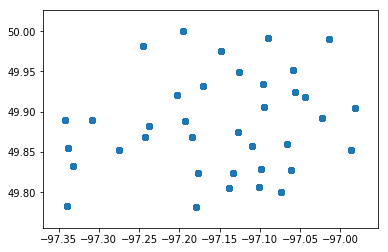

In [10]:
bugs.plot()

### map bugtrap to winnipeg neighbourhoods

In [11]:
bugsubset = bugs[bugs.count_date == bugs.count_date[0]]
print(bugsubset.shape)
bugsubset.head(1)

(37, 5)


,count_date,trap_days,location,bugcount,newgeom
0,2015-05-04T00:00:00,3,north_east_1,0,POINT (-97.05930600000001 49.951867)


In [129]:
hood = neighbourhoods.set_index('id').to_dict(orient='record')
bugloc = bugsubset[['location','newgeom']].set_index('location')
bugloc = bugloc['newgeom'] 
bugloc.head()
trap_in_neighbourhoods = {}
for datum in hood:
    name, the_geom, newgeom = datum.values()
    hoodloc = the_geom['coordinates']
    hoodgeom = shapely.geometry.Polygon(hoodloc[0][0])
    dump = [k for k,v in bugloc.to_dict().items() if hoodgeom.intersects(v)]
    #distance = GeoSeries.distance
    if dump != []:
        if len(dump) == 1:
            trap_in_neighbourhoods[name] = dump[0]


In [130]:
map_bugtraps_to_neighbourhoods = \
{v:k for k,v in trap_in_neighbourhoods.items()}

In [131]:
map_bugtraps_to_neighbourhoods

{'north_east_1': 'River East',
 'north_east_2': 'Rossmere-A',
 'north_east_3': 'Springfield South',
 'north_east_4': 'Talbot-Grey',
 'north_east_5': 'Transcona Yards',
 'north_east_6': 'Grassie',
 'north_east_7': 'Kildare-Redonda',
 'north_west_1': 'Crestview',
 'north_west_2': 'Deer Lodge',
 'north_west_3': 'Minto',
 'north_west_4': 'Brooklands',
 'north_west_5': 'Shaughnessy Park',
 'north_west_6': 'Rosser-Old Kildonan',
 'north_west_7': 'Templeton-Sinclair',
 'rural_ff': 'St. Vital Perimeter South',
 'rural_ii': 'Assiniboia Downs',
 'south_east_1': 'Norwood West',
 'south_east_2': 'Varennes',
 'south_east_3': 'Windsor Park',
 'south_east_4': 'Pulberry',
 'south_east_5': 'Meadowood',
 'south_east_6': 'Island Lakes',
 'south_east_7': 'River Park South',
 'south_west_1': 'West Perimeter South',
 'south_west_2': 'Eric Coy',
 'south_west_3': 'Assiniboine Park',
 'south_west_4': 'North River Heights',
 'south_west_5': 'Chevrier',
 'south_west_6': 'University',
 'south_west_7': 'South Poin

In [132]:
bugs['neighbourhood'] = bugs.location.map(map_bugtraps_to_neighbourhoods)
bugtrap = bugs
bugtrap.head(3).T

,0,1,2
count_date,2015-05-04T00:00:00,2015-05-06T00:00:00,2015-05-08T00:00:00
trap_days,3,2,2
location,north_east_1,north_east_1,north_east_1
bugcount,0,2,0
newgeom,POINT (-97.05930600000001 49.951867),POINT (-97.05930600000001 49.951867),POINT (-97.05930600000001 49.951867)
neighbourhood,River East,River East,River East


### neighbourhood with distance to each trap

In [133]:
def flatten(listoflist):
    oldlist = listoflist
    while type(oldlist) == list:
        newlist = list(itertools.chain(*oldlist))
        if len(newlist) == 1:
            oldlist = newlist
        else:
            return newlist

In [134]:
neighbourhoods.newgeom.shape

(237,)

In [146]:
neighbourhoods_geom_series = neighbourhoods.set_index('name')['newgeom']
print(neighbourhoods_geom_series.shape)
neighbourhoods_geom_series.head()

(237,)


name
Seven Oaks     POLYGON ((-97.11021888431701 49.925633193803, ...
Parker         POLYGON ((-97.17615035641499 49.850537882086, ...
The Maples     POLYGON ((-97.163398354858 49.941591371416, -9...
Luxton         POLYGON ((-97.116047777972 49.920325228662, -9...
Talbot-Grey    POLYGON ((-97.101068054847 49.904738664792, -9...
Name: newgeom, dtype: object

In [139]:
print(bugloc.shape)
bugloc.head()

(37,)


location
north_east_1    POINT (-97.05930600000001 49.951867)
north_east_2            POINT (-97.096341 49.933941)
north_east_3             POINT (-97.05633 49.924809)
north_east_4            POINT (-97.094797 49.906175)
north_east_5            POINT (-97.022426 49.892358)
Name: newgeom, dtype: object

In [155]:
[x for x in neighbourhoods_geom_series.items()][0]

('Seven Oaks', <shapely.geometry.polygon.Polygon at 0x7faa7e70a320>)

In [176]:
import geopandas
from geopandas import GeoSeries

In [178]:
GeoSeries([neighbourhoods_geom_series[0]], index= bugloc.index)

location
north_east_1    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_2    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_3    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_4    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_5    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_6    POLYGON ((-97.11021888431701 49.925633193803, ...
north_east_7    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_1    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_2    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_3    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_4    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_5    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_6    POLYGON ((-97.11021888431701 49.925633193803, ...
north_west_7    POLYGON ((-97.11021888431701 49.925633193803, ...
rural_aa        POLYGON ((-97.11021888431701 49.925633193803, ...
r

In [182]:
GeoSeries.distance(bugloc, 
                   GeoSeries([neighbourhoods_geom_series[0]], index= bugloc.index)
                  )

location
north_east_1    0.043155
north_east_2    0.007526
north_east_3    0.046994
north_east_4    0.024829
north_east_5    0.091720
north_east_6    0.060962
north_east_7    0.124259
north_west_1    0.189770
north_west_2    0.124492
north_west_3    0.081313
north_west_4    0.080163
north_west_5    0.047634
north_west_6    0.047348
north_west_7    0.014283
rural_aa        0.132540
rural_bb        0.099653
rural_cc        0.051961
rural_dd        0.100499
rural_ee        0.143982
rural_ff        0.130655
rural_gg        0.262004
rural_hh        0.228198
rural_ii        0.222377
south_east_1    0.053516
south_east_2    0.068834
south_east_3    0.079206
south_east_4    0.103973
south_east_5    0.097311
south_east_6    0.109957
south_east_7    0.119675
south_west_1    0.230894
south_west_2    0.170759
south_west_3    0.134674
south_west_4    0.086568
south_west_5    0.119065
south_west_6    0.123318
south_west_7    0.157775
dtype: float64

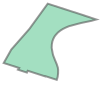

In [183]:
area_geom

In [184]:
from geopandas import GeoSeries
result = {}
for area_name, area_geom in neighbourhoods_geom_series.items():
    output = GeoSeries.distance(bugloc, 
                   GeoSeries([area_geom], index= bugloc.index)
                  )
    result[area_name] = output
    

In [202]:
distance_matrix_between_neighbourhood_and_bugtraps = \
pd.DataFrame(result)

In [203]:
distance_matrix_between_neighbourhood_and_bugtraps.head().T.head().T

,Agassiz,Airport,Alpine Place,Amber Trails,Archwood
location,,,,,
north_east_1,0.154652,0.157004,0.100539,0.101878,0.080319
north_east_2,0.121501,0.116964,0.076125,0.068894,0.052075
north_east_3,0.134564,0.155522,0.077276,0.109726,0.060350
north_east_4,0.097174,0.116791,0.048351,0.083888,0.024578
north_east_5,0.139302,0.189944,0.080246,0.153212,0.073227


In [207]:
df = distance_matrix_between_neighbourhood_and_bugtraps

In [217]:
winnipeg_areas = pd.DataFrame(neighbourhoods.set_index('name')['newgeom'])

In [298]:
import numpy as np
import pandas as pd
winnipeg_areas = pd.DataFrame(neighbourhoods.set_index('name')['newgeom'])
winnipeg_areas.index.name = 'area_name'
winnipeg_areas = winnipeg_areas.rename(columns = {'newgeom':'area_geom'})
df = distance_matrix_between_neighbourhood_and_bugtraps
winnipeg_areas['nearest_bugtrap'] = df.apply(pd.Series.idxmin)
winnipeg_areas['nearest_bugtrap_geom'] \
= winnipeg_areas['nearest_bugtrap'].map(bugloc)
winnipeg_areas['nearest_bugtrap_distance'] = df.apply(np.min)
winnipeg_areas['area_intersects_bugtrap'] =\
[
    datum['nearest_bugtrap_geom'].intersects(datum['area_geom'])
    for area_name, datum in winnipeg_areas.iterrows()    
]

# make sure everything is a geo-related pdseries
winnipeg_areas = winnipeg_areas.apply(lambda x: GeoSeries(x))
winnipeg_areas = GeoDataFrame(winnipeg_areas)
winnipeg_areas.head(1).T

area_name,Seven Oaks
area_geom,"POLYGON ((-97.11021888431701 49.925633193803, ..."
nearest_bugtrap,north_east_2
nearest_bugtrap_geom,POINT (-97.096341 49.933941)
nearest_bugtrap_distance,0.00752645
area_intersects_bugtrap,False


In [300]:
bikes.asset_class.unique()

array(['STAND-ALONE PLAY COMPONENT', 'SEATING', 'SWING SET',
       'PLAY STRUCTURE', 'BICYCLE RACK', 'MONUMENT', 'BBQ', 'SHELTER',
       'TOBOGGAN RUN', 'FITNESS EQUIPMENT'], dtype=object)

## visualize maps

In [284]:
import folium

In [258]:
wpg_xy = [49.8951, -97.1384] # center of winnipeg via wikipedia

In [267]:
folium.features.GeoJson(winnipeg_areas.area_geom.to_dict())

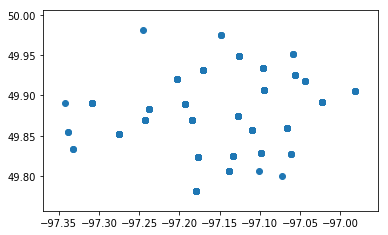

In [297]:
ax = winnipeg_areas.set_geometry('nearest_bugtrap_geom').plot()

In [296]:
winnipeg_areas.to_crs()

AttributeError: No geometry data set yet (expected in column 'geometry'.

In [271]:
GeoDataFrame(winnipeg_areas).area_geom

AttributeError: 'Series' object has no attribute 'to_crs'

In [266]:
mapwpg = folium.Map(wpg_xy)
mapwpg.add_children(
  
                   )
mapwpg

/home/ruxi/miniconda3/envs/winnipeg/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: Object of type 'Polygon' is not JSON serializable

In [ ]:
folium.Map()